<a href="https://colab.research.google.com/github/VigneshAnalyticPro/zomato_customer_data/blob/main/zomato_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## zomato customer data analysis:

objective of this project :

1) What type of restaurant do the majority of customers order from?

2) How many votes has each type of restaurant received from customers?

3) What are the ratings that the majority of restaurants have received?

4)Zomato has observed that most couples order most of their food online. What  
  is their average spending on each order?

5) Which mode (online or offline) has received the maximum rating?

6) Which type of restaurant received more offline orders, so that Zomato can customers with some good offers?


step: 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [ ]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


#convert the data type of column-rate ( 4.2/5 into 4.2)


In [ ]:
def rate(value):
  value=str(value).split("/")
  value = value[0]
  return float(value)

df["rate"]=df["rate"].apply(rate)
print(df)


                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

# objective:

1) What type of restaurant do the majority of customers order from?

In [ ]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


Text(0.5, 1.0, 'type of restaurant')

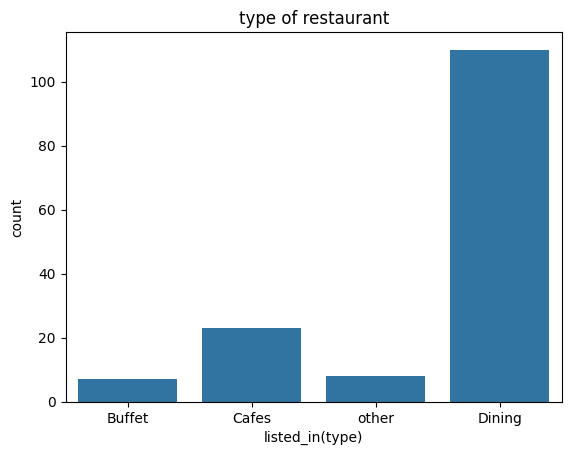

In [ ]:
sns.countplot(x=df["listed_in(type)"])
plt.title("type of restaurant")

# Answer: majority of customers order from dining.



2) How many votes has each type of restaurant received from customers?

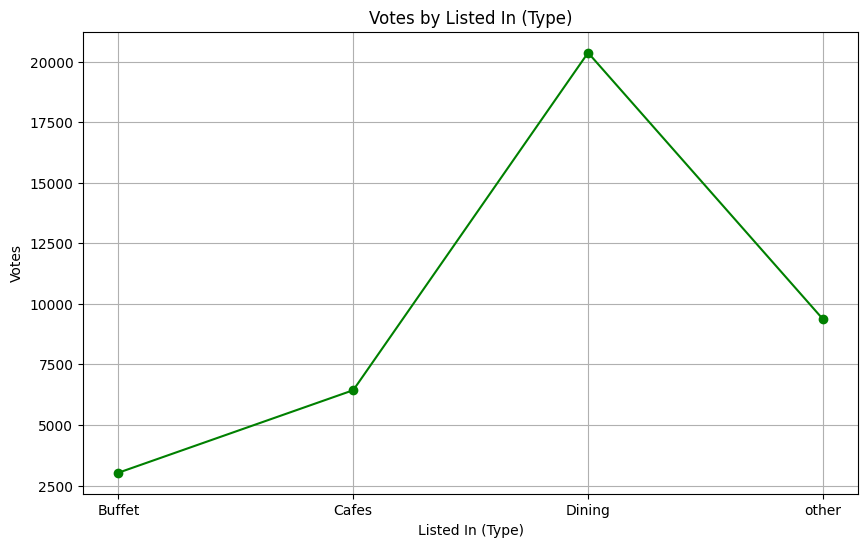

In [ ]:
group_data = df.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes": group_data})
plt.figure(figsize=(10, 6))
plt.plot(result.index, result["votes"], c="green", marker="o")
plt.xlabel("Listed In (Type)")
plt.ylabel("Votes")
plt.title("Votes by Listed In (Type)")
plt.grid(True)
plt.show()



# Answer: dining resturent has recived maximum votes

In [ ]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


3) What are the ratings that the majority of restaurants have received?

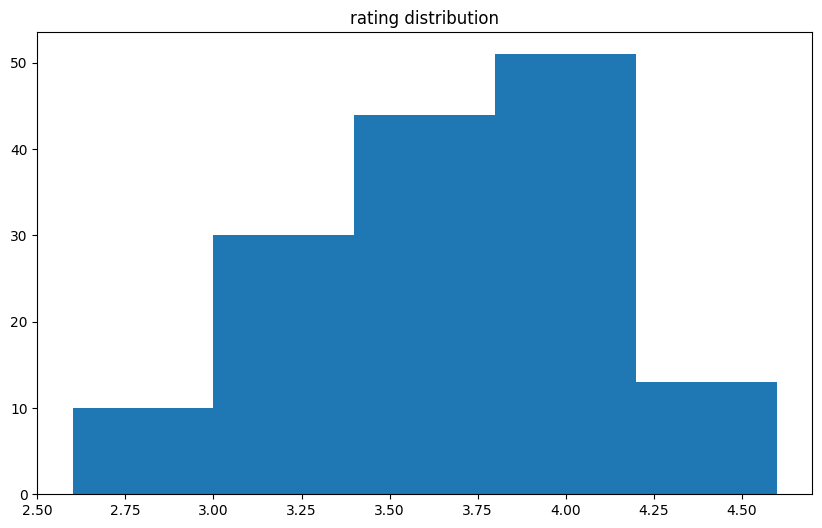

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df["rate"],bins =5)
plt.title("rating distribution")
plt.show()

answer: majority resturent received rating from 3.76 to 4.20

4) Zomato has observed that most couples order most of their food online. What
is their average spending on each order?

In [ ]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

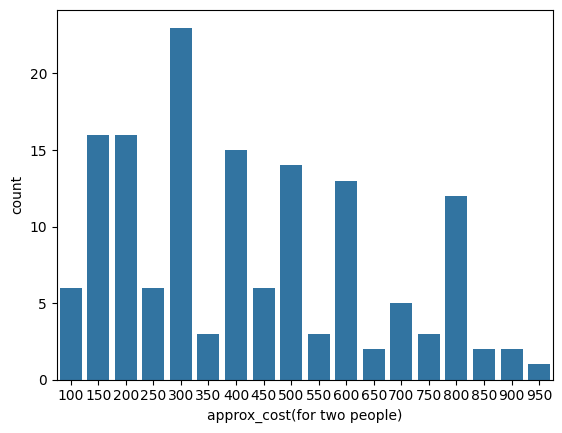

In [ ]:
couple_data = df["approx_cost(for two people)"]
sns.countplot(x=couple_data)

In [ ]:
average_cost = df["approx_cost(for two people)"].mean()

print(f"Average cost for two people: {average_cost}")


Average cost for two people: 418.2432432432432


answer:average spending on each order :418.24

5) Which mode (online or offline) has received the maximum rating?

In [ ]:
df


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


<Axes: xlabel='online_order', ylabel='rate'>

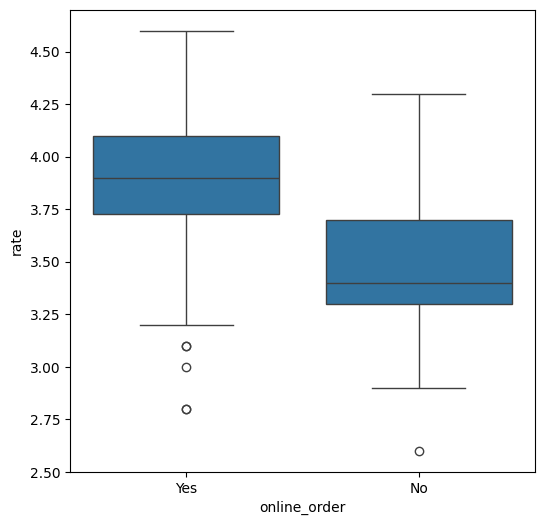

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate",data=df)

answer : offline orders received lower rating is comparision to online order

6) Which type of restaurant received more offline orders, so that Zomato can customers with some good offers?

In [ ]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


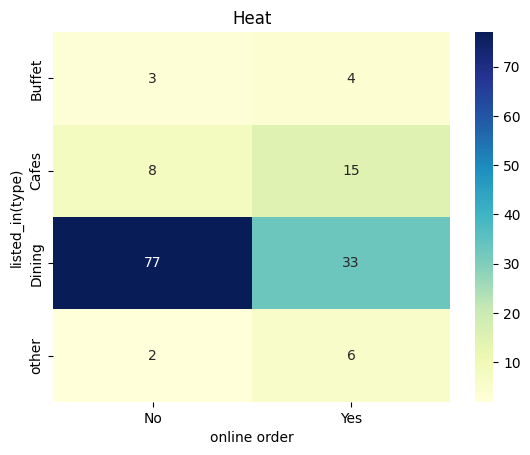

In [ ]:
pivot_table =df.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt="d")
plt.title("Heat")
plt.xlabel("online order")
plt.ylabel("listed_in(type)")
plt.show()


answer: Dining restaurants received the most offline orders, with a total of 5,418 votes.